
# Data Set Information:

**Context:**
Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable RainTomorrow.

**Content:**
This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).

This column is marked 'Yes' if the rain for that day was 1mm or more.
Source & Acknowledgements.
The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.
For example, you can check the latest weather observations in Canberra here: Canberra Weather.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

**Kaggle project:** https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

# Set up

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid", palette="bright")

import os

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Colab Notebooks/EPAM DS foundations course/DS_module3/weatherAUS.csv'
df = pd.read_csv(path, sep=',')

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Reading the data

In [ ]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.head().T

0           1           2           3           4
Date           2008-12-01  2008-12-02  2008-12-03  2008-12-04  2008-12-05
Location           Albury      Albury      Albury      Albury      Albury
MinTemp              13.4         7.4        12.9         9.2        17.5
MaxTemp              22.9        25.1        25.7        28.0        32.3
Rainfall              0.6         0.0         0.0         0.0         1.0
Evaporation           NaN         NaN         NaN         NaN         NaN
Sunshine              NaN         NaN         NaN         NaN         NaN
WindGustDir             W         WNW         WSW          NE           W
WindGustSpeed        44.0        44.0        46.0        24.0        41.0
WindDir9am              W         NNW           W          SE         ENE
WindDir3pm            WNW         WSW         WSW           E          NW
WindSpeed9am         20.0         4.0        19.0        11.0         7.0
WindSpeed3pm         24.0        22.0        26.0         9.0        20.0
Humidity9am          71.0        44.0        38.0        45.0        82.0
Humidity3pm          22.0        25.0        30.0        16.0        33.0
Pressure9am        1007.7      1010.6      1007.6      1017.6      1010.8
Pressure3pm        1007.1      1007.8      1008.7      1012.8      1006.0
Cloud9am              8.0         NaN         NaN         NaN         7.0
Cloud3pm              NaN         NaN         2.0         NaN         8.0
Temp9am              16.9        17.2        21.0        18.1        17.8
Temp3pm              21.8        24.3        23.2        26.5        29.7
RainToday              No          No          No          No          No
RainTomorrow           No          No          No          No          No

In [ ]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

In [ ]:
# Count NaN values per column
nan_counts = df.isna().sum()
nan_counts = pd.DataFrame(nan_counts, columns=["NaN's count"])
nan_counts['pers, %'] = round(nan_counts["NaN's count"]/len(df)*100, 2)
print(nan_counts)

               NaN's count  pers, %
Date                     0     0.00
Location                 0     0.00
MinTemp               1485     1.02
MaxTemp               1261     0.87
Rainfall              3261     2.24
Evaporation          62790    43.17
Sunshine             69835    48.01
WindGustDir          10326     7.10
WindGustSpeed        10263     7.06
WindDir9am           10566     7.26
WindDir3pm            4228     2.91
WindSpeed9am          1767     1.21
WindSpeed3pm          3062     2.11
Humidity9am           2654     1.82
Humidity3pm           4507     3.10
Pressure9am          15065    10.36
Pressure3pm          15028    10.33
Cloud9am             55888    38.42
Cloud3pm             59358    40.81
Temp9am               1767     1.21
Temp3pm               3609     2.48
RainToday             3261     2.24
RainTomorrow          3267     2.25


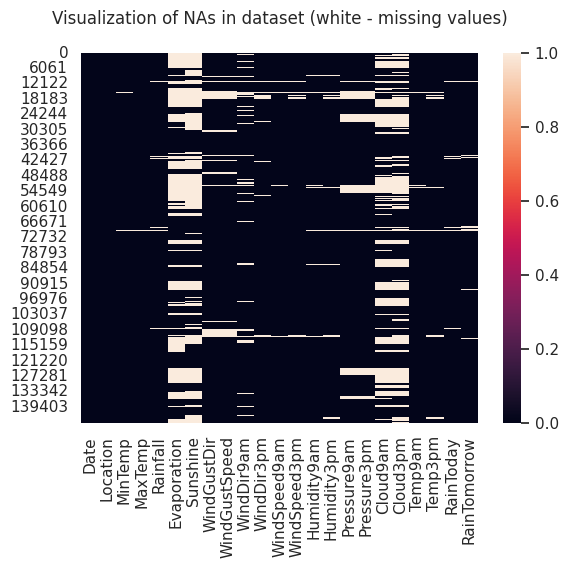

In [ ]:
sns.heatmap(df.isna());
plt.title('Visualization of NAs in dataset (white - missing values)\n');

### ToDo Enhancements:
After accessing the dataset, here are some enhancements and descrepencies that could be improved:

*   data cast to datetime
*   encode rain today and rain tomorrow to bool
* remove rows without value in target variable
* remove duplicates
* remove rows with lots of missing values ( more than a half for a row )

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

there're some missing values in target variable. There's nothing we can do, so just remove those rows:

In [6]:
df = df.dropna(subset=['RainTomorrow'])
len(df)

142193

In [7]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [8]:
yes_no_mapping = {'Yes': 1.0, 'No': 0.0}
df['RainToday_encoded'] = df['RainToday'].map(yes_no_mapping)
df['RainTomorrow_encoded'] = df['RainTomorrow'].map(yes_no_mapping)

Now let's see if there were some 'bad days', that contain mostly missing values:

In [9]:
print('Maximum number of missing values = number of columns in df = {}'.format(len(df.columns)))

Maximum number of missing values = number of columns in df = 24


In [10]:
len(df.columns)

24

In [11]:
df['missed_values_count'] = df.isnull().sum(axis=1)

In [12]:
len(df[df['missed_values_count'] > 11])

1187

In [13]:
df = df[df['missed_values_count'] < 12]
len(df)

141006

In [14]:
df.drop('missed_values_count', axis=1, inplace=True)

In [15]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
Date                                                                        
2008-12-01           W           44.0          W        WNW          20.0   
2008-12-02         WNW           44.0        NNW        WSW           4.0   
2008-12-03         WSW           46.0          W        WSW          19.0   
2008-12-04          NE           24.0         SE          E          11.0   
2008-12-05           W           41.0        ENE         NW           7.0   

            WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
Date                                                                           
2008-12-01          24.0         71.0         22.0       1007.7       1007.1   
2008-12-02          22.0         44.0         25.0       1010.6       1007.8   
2008-12-03          26.0         38.0         30.0       1007.6       1008.7   
2008-12-04           9.0         45.0         16.0       1017.6       1012.8   
2008-12-05          20.0         82.0         33.0       1010.8       1006.0   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  \
Date                                                                      
2008-12-01       8.0       NaN     16.9     21.8        No           No   
2008-12-02       NaN       NaN     17.2     24.3        No           No   
2008-12-03       NaN       2.0     21.0     23.2        No           No   
2008-12-04       NaN       NaN     18.1     26.5        No           No   
2008-12-05       7.0       8.0     17.8     29.7        No           No   

            RainToday_encoded  RainTomorrow_encoded  
Date                                                 
2008-12-01                0.0                   0.0  
2008-12-02                0.0                   0.0  
2008-12-03                0.0                   0.0  
2008-12-04                0.0                   0.0  
2008-12-05                0.0                   0.0

# Storing the base dataset

In [16]:
base_df = df.copy()

In [17]:
base_df.to_csv('base_df.csv', index='Date')  # Save the DataFrame as a CSV file
files.download('base_df.csv')  # Download the CSV file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ydata-profiling

In [ ]:
import ydata_profiling

In [ ]:
profile = ydata_profiling.ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# removing duplicates
# len(df[df.duplicated()])
# df[df.duplicated()].head()
# df = df.drop_duplicates()

0

# Multivariate analysis

In [ ]:
continuous_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                   'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

In [ ]:
# Use a list of column names to select multiple columns for the lineplot. Code need significant time to build a chart.
# plt.figure(figsize=(40, 15))
# sns.lineplot(df[continuous_vars])
# plt.show()

## All time lineplot

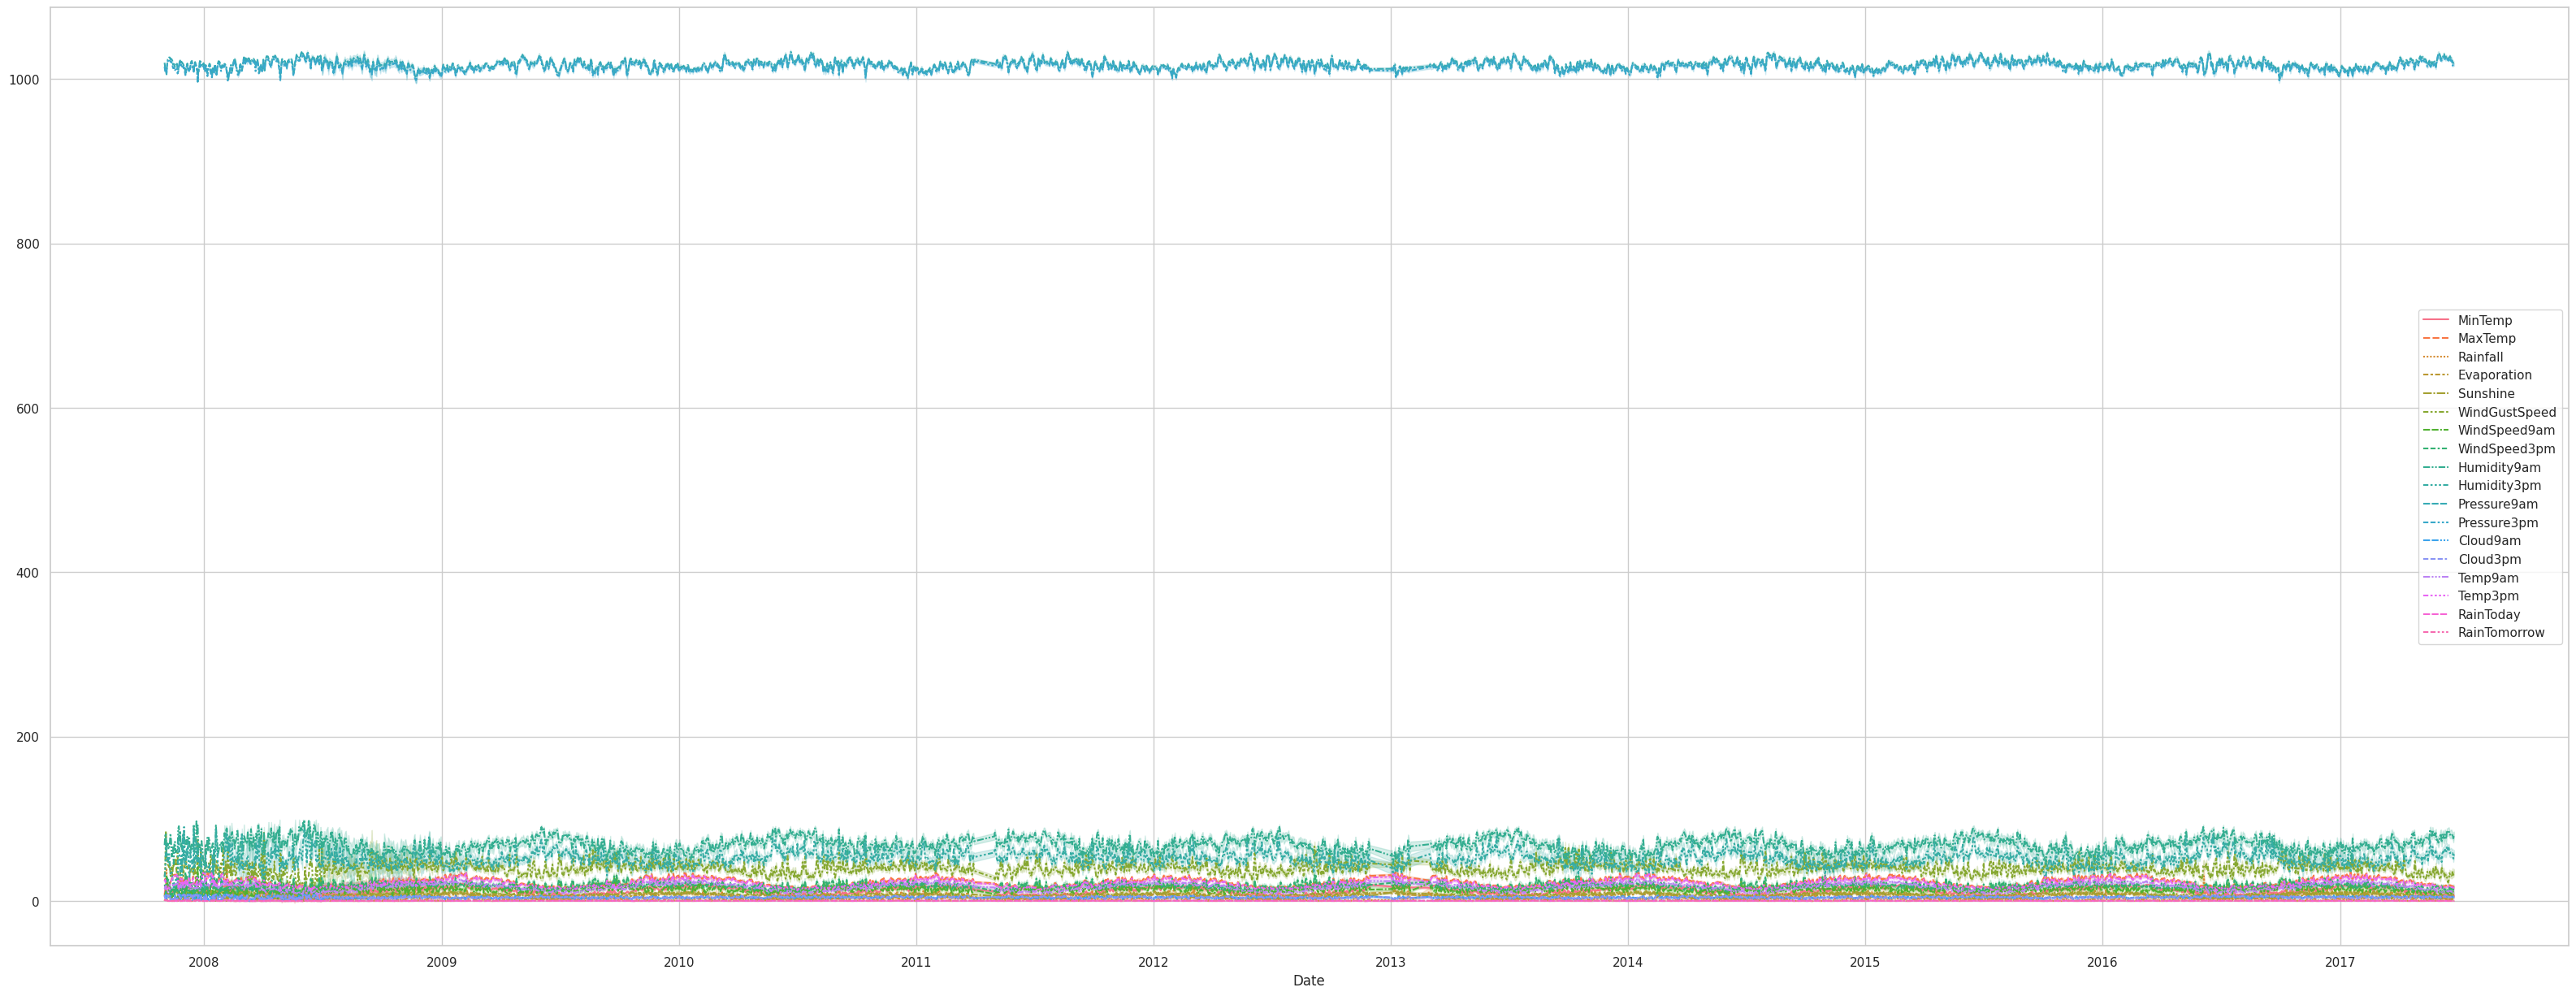

## One year lineplot ( 2016 )

In [ ]:
df_2016 = df[df.index.year.isin([2016])]
len(df_2016)

17300

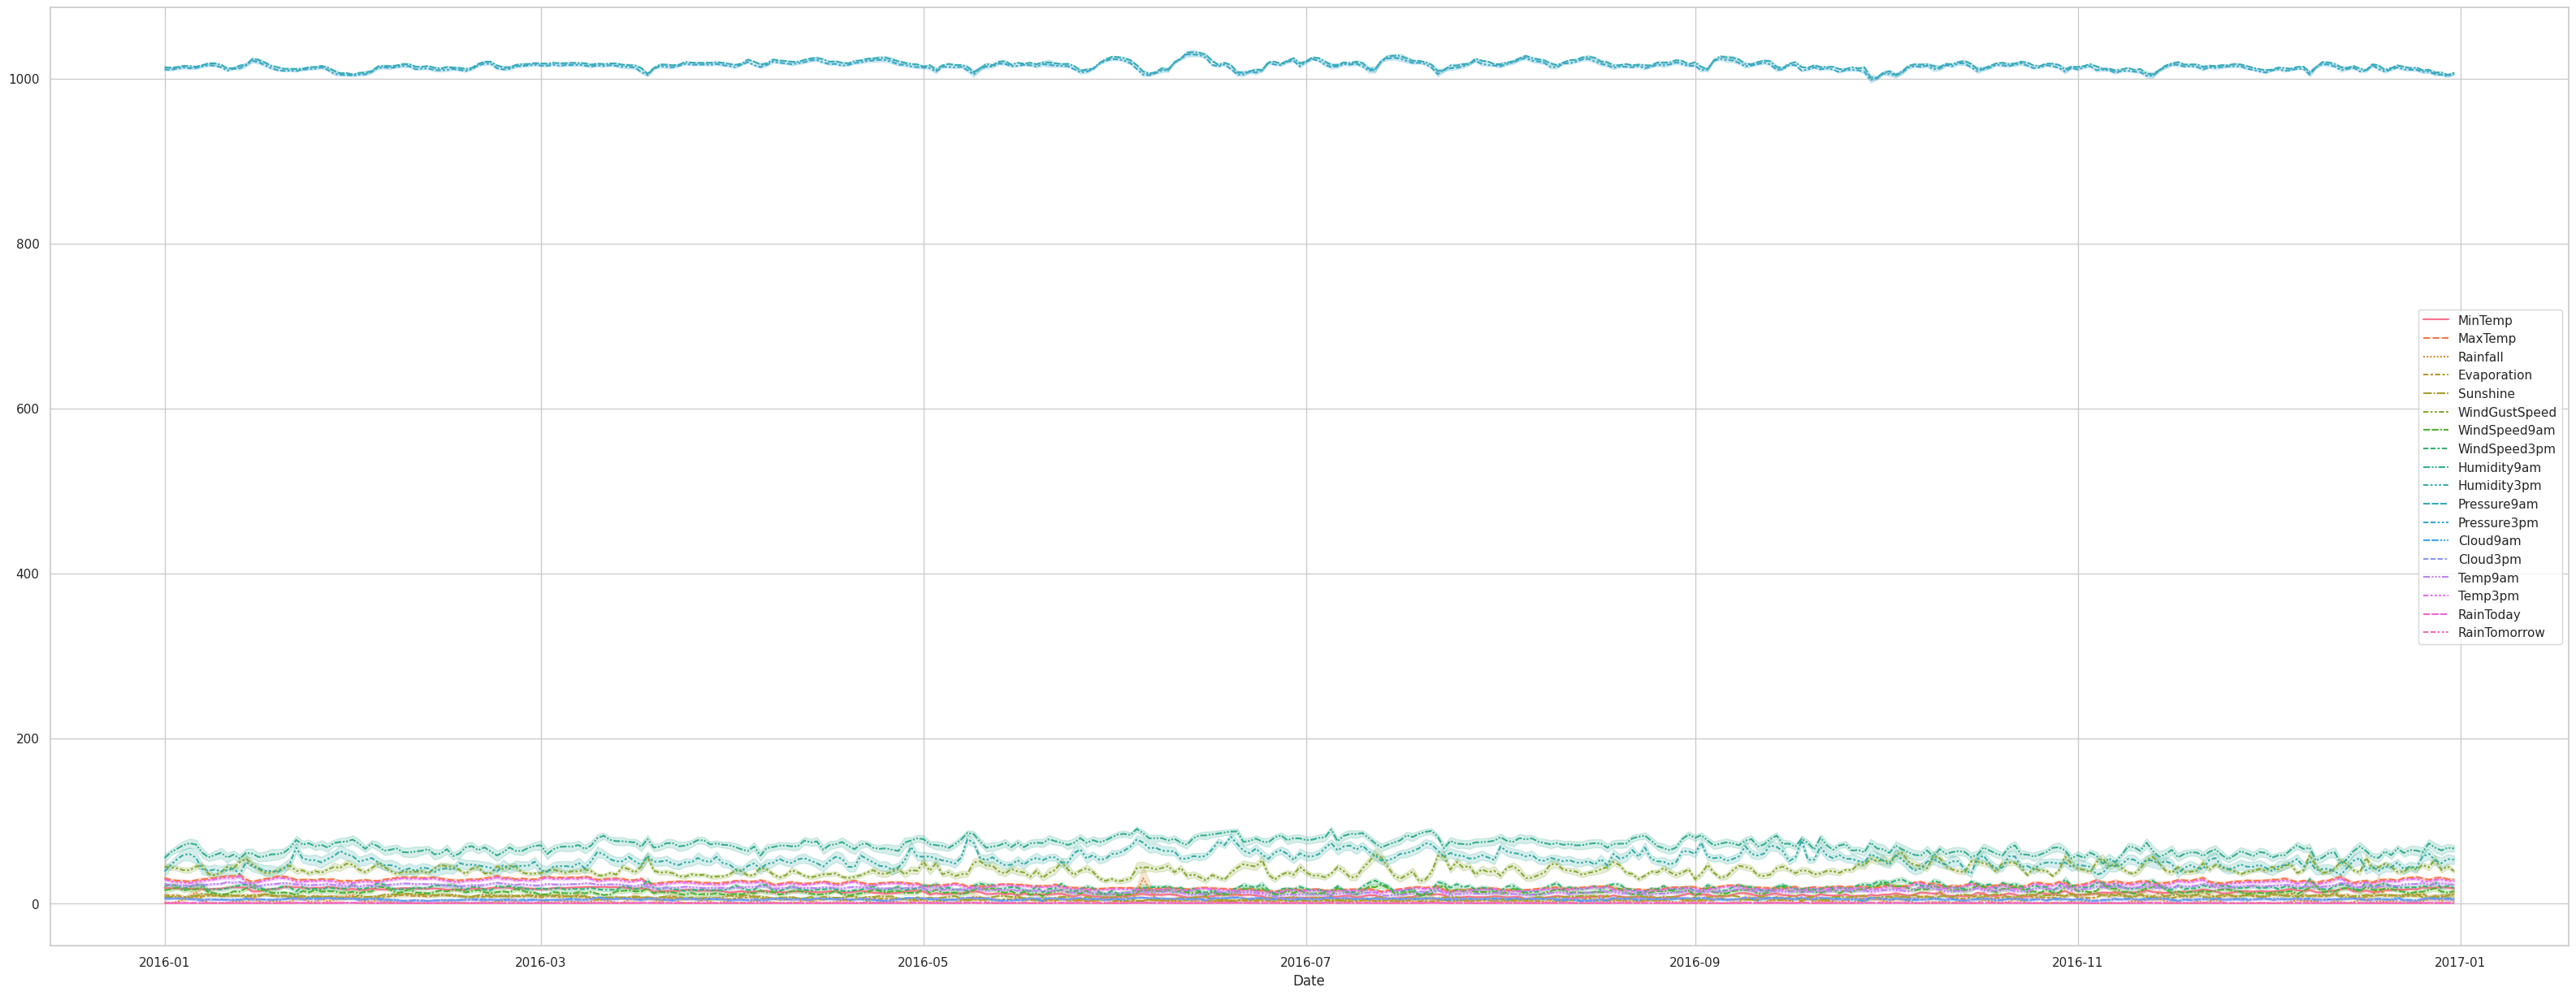

In [ ]:
plt.figure(figsize=(40, 15))
# Use a list of column names to select multiple columns for the lineplot
sns.lineplot(df_2016[continuous_vars])
plt.show()

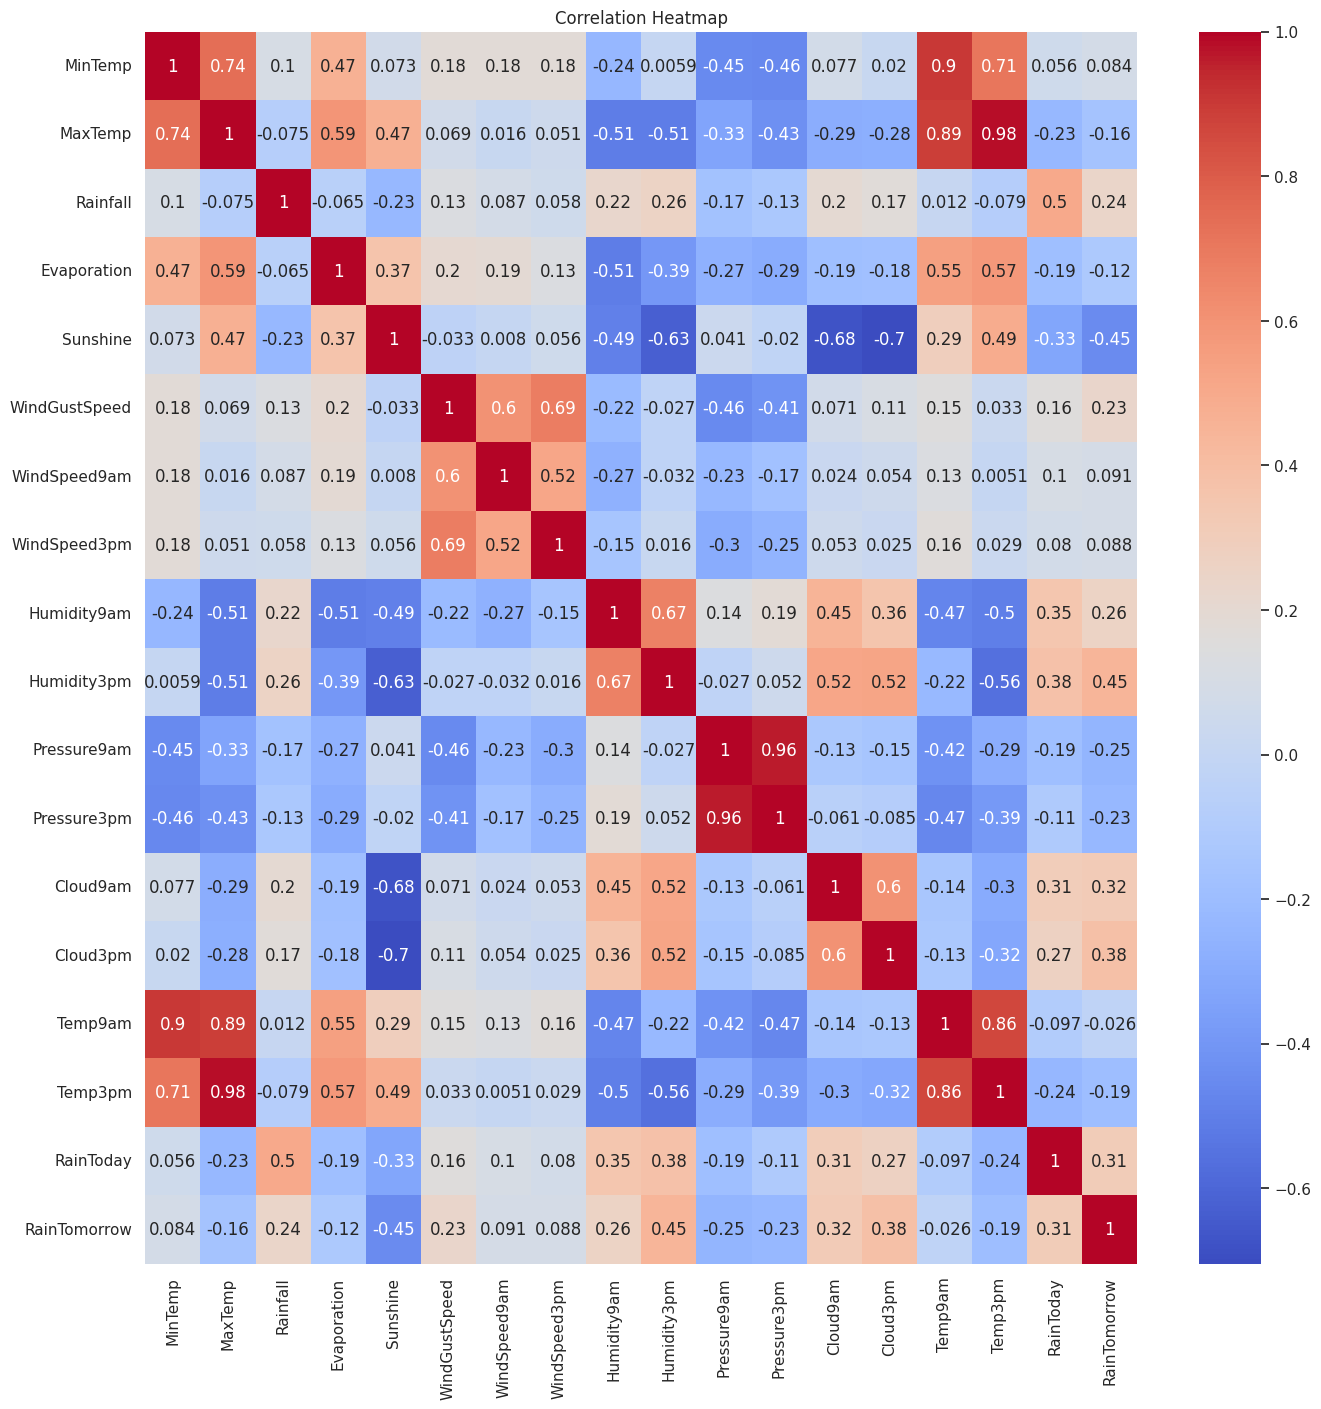

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(4, 4))
sns.pairplot(df[continuous_vars], diag_kind='kde',  hue='RainTomorrow')
plt.show()

KeyboardInterrupt: 

<Figure size 400x400 with 0 Axes>

Error in callback <function flush_figures at 0x7deaa6619ab0> (for post_execute):


KeyboardInterrupt: 

## Temperature

<Figure size 400x400 with 0 Axes>

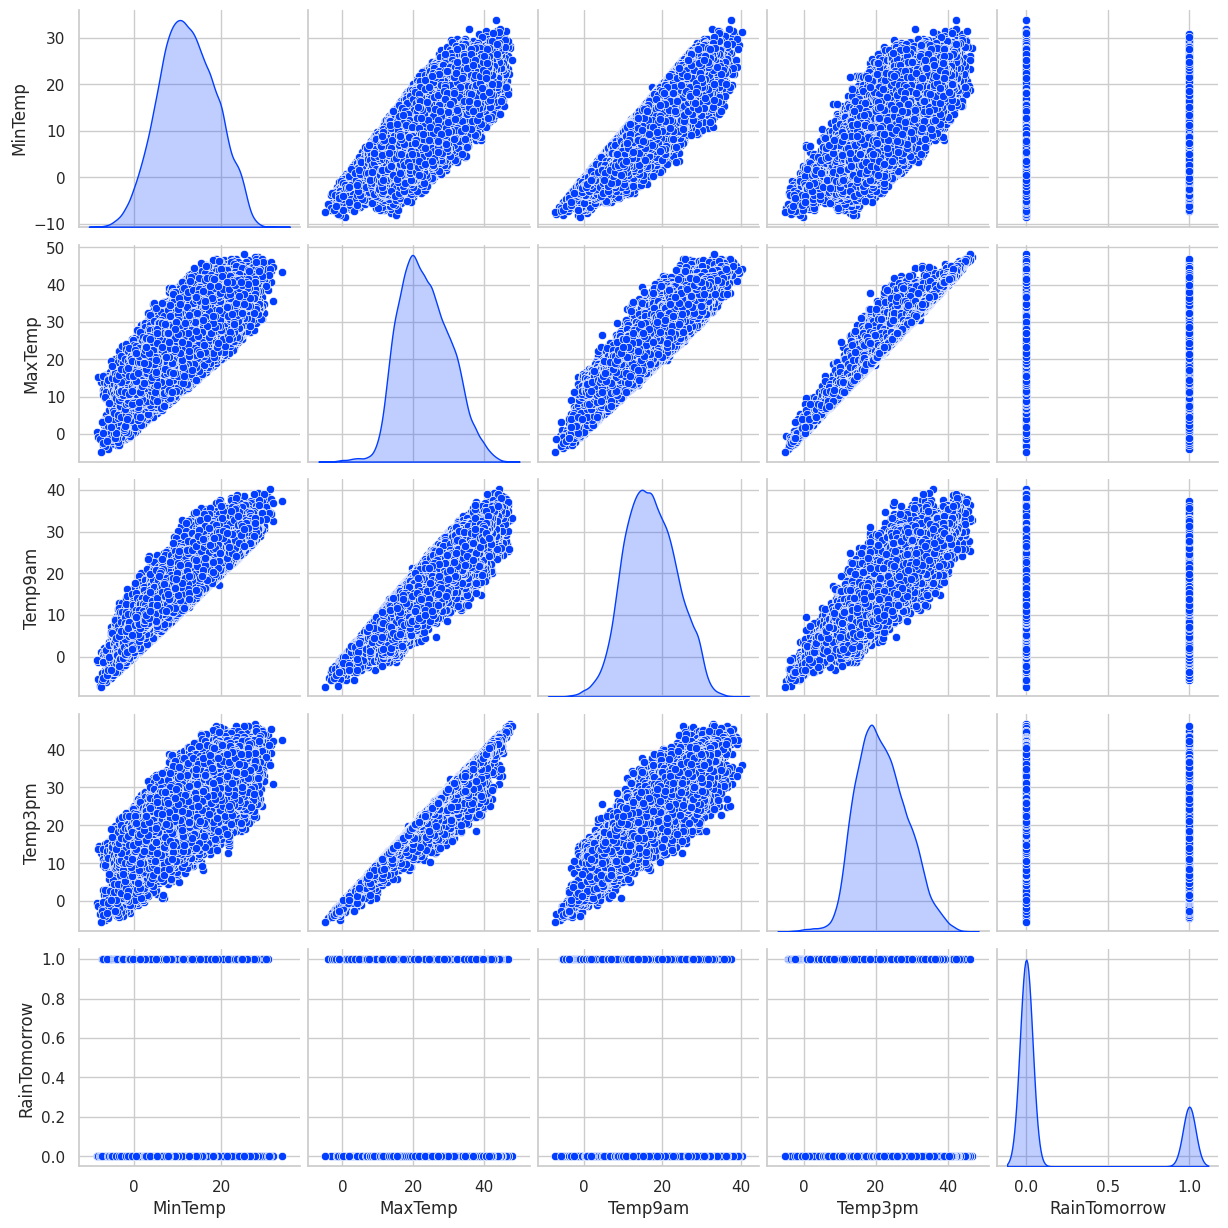

In [ ]:
df_temp = df.reset_index()

plt.figure(figsize=(4, 4))
sns.pairplot(df_temp[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'RainTomorrow']], diag_kind='kde')
plt.show()

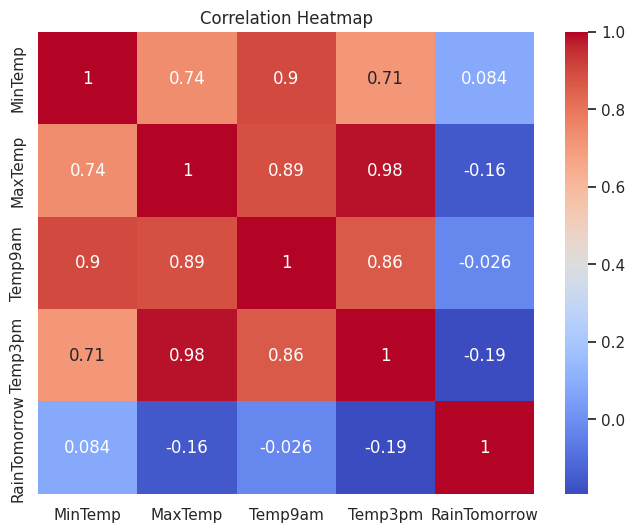

In [ ]:
# Create a heatmap to visualize the correlation coefficients
plt.figure(figsize=(8, 6))
sns.heatmap(df_temp[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'RainTomorrow']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Wind

<Figure size 400x400 with 0 Axes>

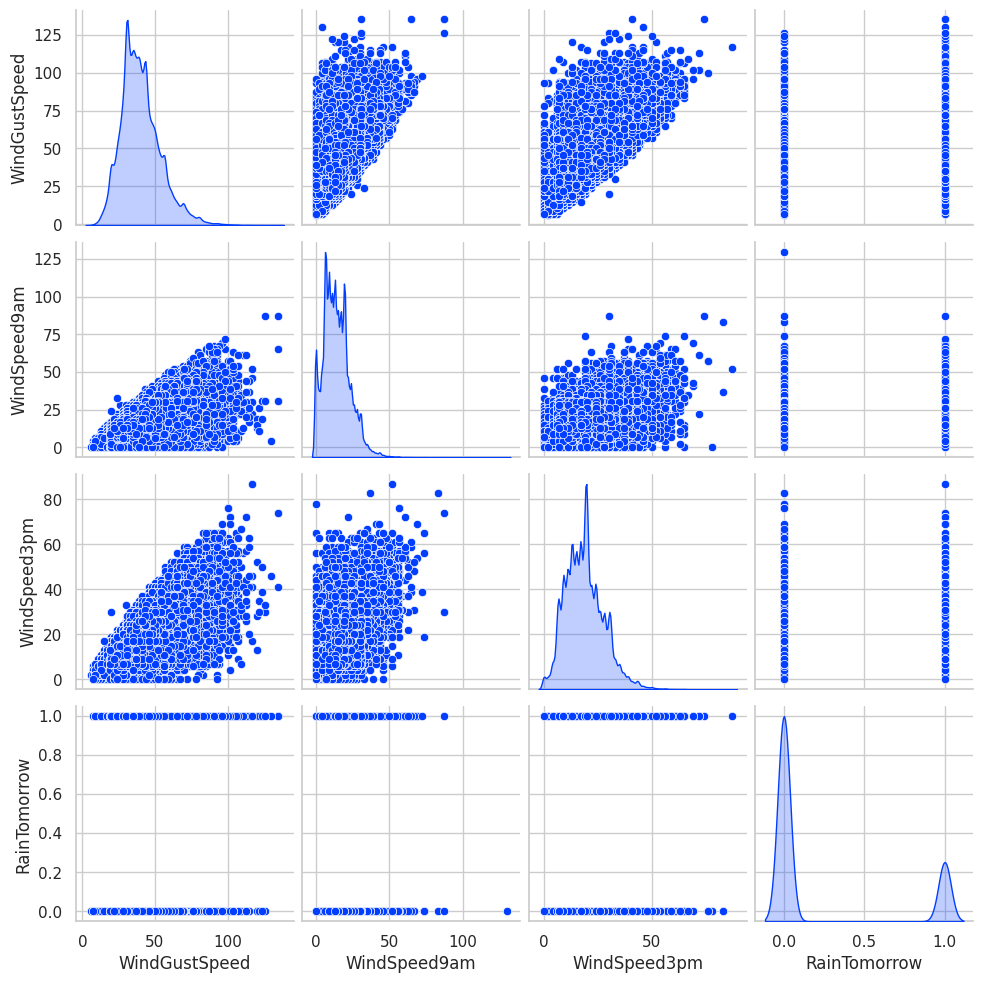

In [ ]:
plt.figure(figsize=(4, 4))
sns.pairplot(df_temp[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RainTomorrow']], diag_kind='kde')
plt.show()

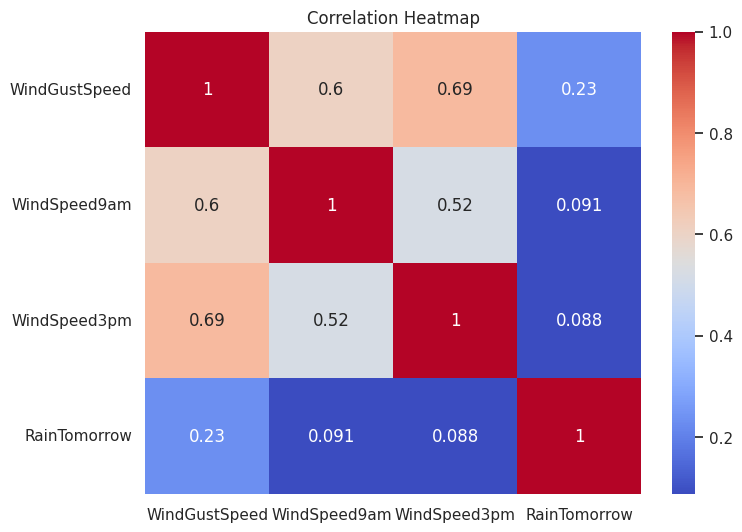

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_temp[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RainTomorrow']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Other

In [ ]:
plt.figure(figsize=(4, 4))
sns.pairplot(df_temp[['Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                   'RainToday', 'RainTomorrow']], diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Univariate analysis

Let's consider highly correlated and categorical features for Univariate analysis.

Correlated continuous:
- Sunshine
- Humidity 3pm
- Cloud 3pm

Categorical:
- RainToday
- WindGustDir, WindDir9am, WindDir3pm
- Location


In [ ]:
# revert labels and indexing back:
one_zero_mapping = {1: "Yes", 0: "No"}
df['RainToday_orig'] = df['RainToday'].map(one_zero_mapping)
df['RainTomorrow_orig'] = df['RainTomorrow'].map(one_zero_mapping)
df = df.reset_index()

# Define a custom color palette
custom_palette = {'Yes': 'blue', 'No': 'orange'}

## RainToday

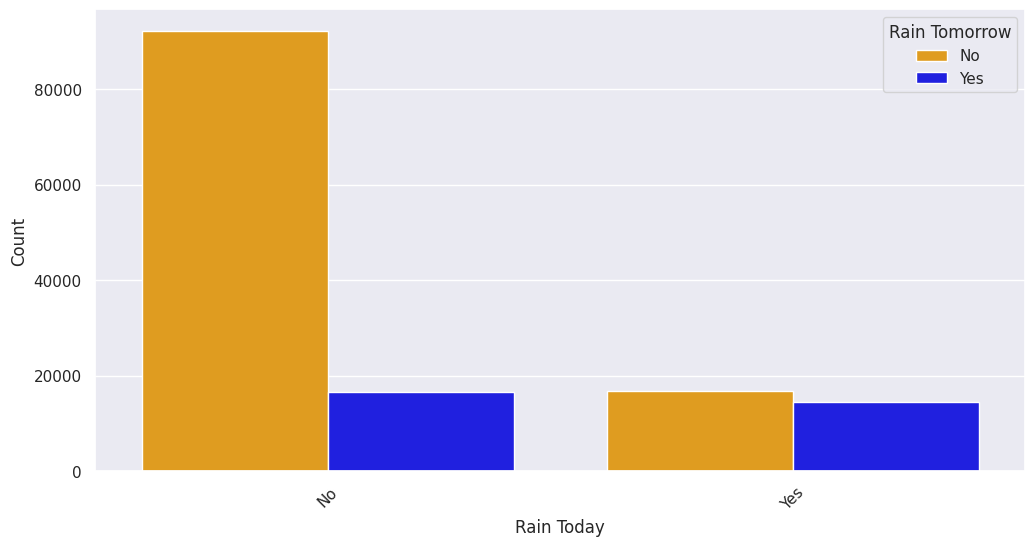

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='RainToday_orig', hue='RainTomorrow_orig', data=df, palette=custom_palette)
plt.legend(title='Rain Tomorrow')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Sunshine

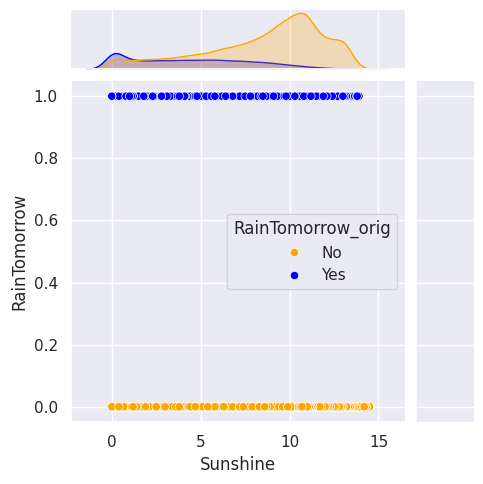

In [ ]:
sns.jointplot(x= df['Sunshine'], y = df['RainTomorrow'], kind='scatter', height=5, hue=df['RainTomorrow_orig'], palette=custom_palette)

## Humidity 3pm

<ipython-input-109-b6e9f6de0d49>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Humidity3pm', ylabel='Density'>

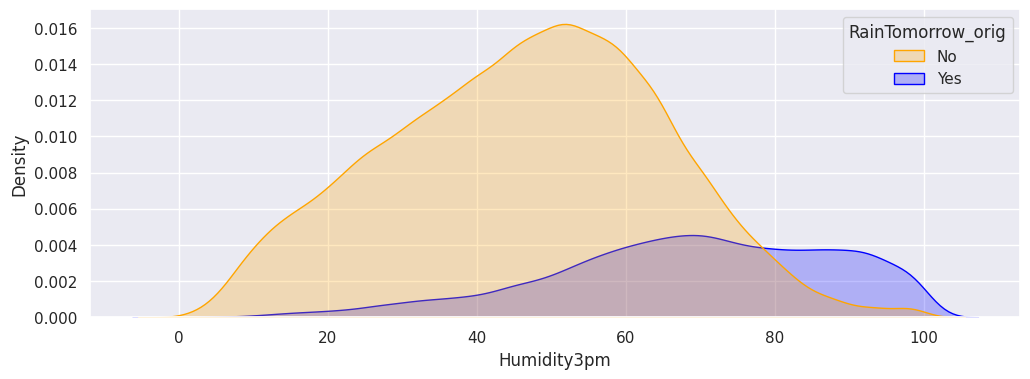

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
sns.kdeplot(data = df, x = df['Humidity3pm'], hue=df['RainTomorrow_orig'], shade=True, palette=custom_palette)

## Cloud 3pm

<ipython-input-110-4803075bf0b3>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Cloud3pm', ylabel='Density'>

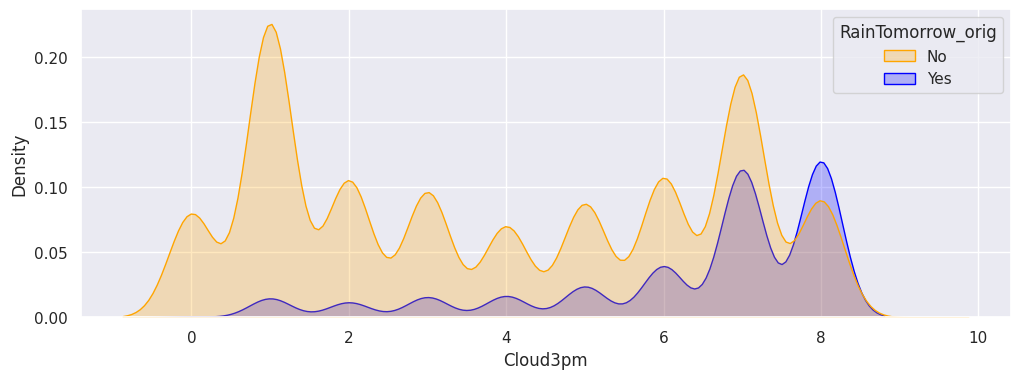

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))
sns.kdeplot(data = df, x = df['Cloud3pm'], hue=df['RainTomorrow_orig'], shade=True, palette=custom_palette)

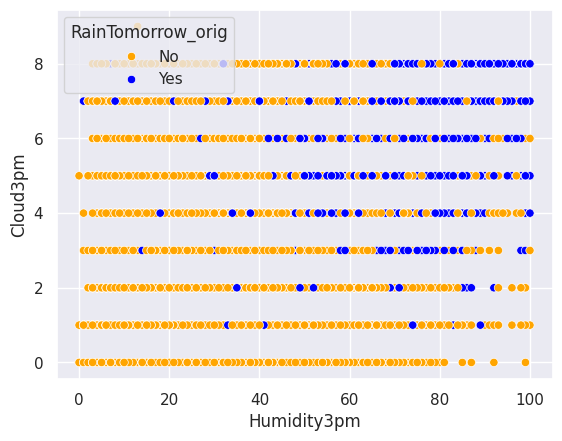

In [ ]:
# Create a scatterplot with custom colors
sns.scatterplot(data=df, x='Humidity3pm', y='Cloud3pm', hue='RainTomorrow_orig', palette=custom_palette)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



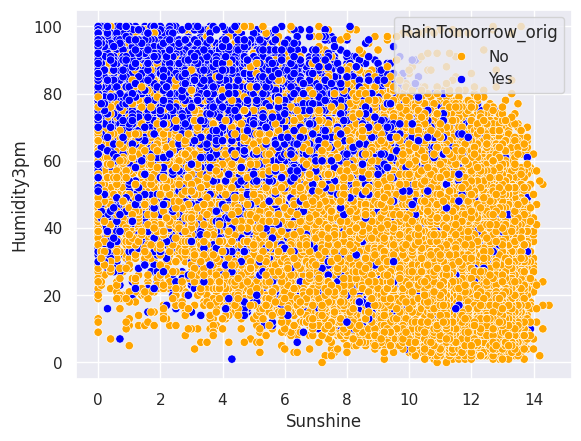

In [ ]:
sns.scatterplot(data=df, x='Sunshine', y='Humidity3pm', hue='RainTomorrow_orig', palette=custom_palette)
plt.show()

## Wind Direction

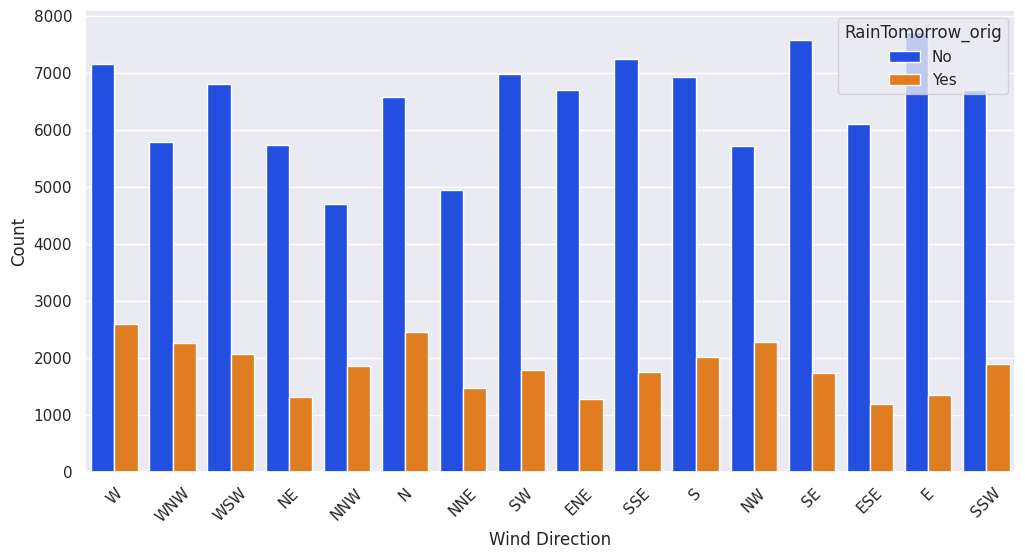

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='WindGustDir', hue='RainTomorrow_orig', data=df)
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assuming 'Location' column represents cities
fig = px.treemap(df[df['RainTomorrow']==1], path=['Location'], title="Cities with Rain tomorrow Distribution" )
fig.update_traces(textinfo="label+percent entry")
fig.show()

# Conclusion

## Consuderations regarding data imputations:

### Missing values imputation ideas:
would be nice to create a separate dataset, based on the initial, within the week cadance. There I could calculate averaged values for target missed features. I think that approach could help inpute data reasonably well.
another approach would be use mean/median values
Regression modeling inpite data approach

### Numerical Variables:
- MinTemp, MaxTemp: mean or median

- Temp9am, Temp3pm: mean or median
Consider using k-NN imputation for potentially more accurate results, especially since there're relationships with other variables.

- Rainfall, Evaporation:  Use median imputation due to skeweness distributions and outliers.

- **Sunshine**: could be median, or more sophisticated method like regression imputation since there's a clear relationship with target variable.  Zero imputation might also be vorking.

- WindGustSpeed, WindSpeed9am, WindSpeed3pm: median

- Humidity9am, Humidity3pm: median

- Pressure9am, Pressure3pm: mean or median

- Cloud9am, Cloud3pm:  mean or median or mode

### Categorical Variables:
- WindGustDir, WindDir9am, WindDir3pm: mode
- RainToday: mode

---



## Feature engineering candidates:
- hanlde outliers with normalization, capping
- extract geo metadata from City feature
- Encode Wind Directions
- extract and encode season/month from data
- temperature - calculate deltas of, + pers of change ( frost or heatwaves )
- humidity variability, + pers
- Lagged features - yesterday's humidity, temperature
- Rolling averages for the last week/3 days - for Temperature, Pressure, Humidity Averages. Could help to highlight longer-term trends.

